In [1]:
import networkx as nx
import matplotlib.pyplot as plt

%matplotlib inline

## algorithm

In [2]:
def test_bipartiteness(graph):
    partition = {}
    nodes = [(i, None) for i in graph]

    while nodes:
        node, color = nodes.pop()

        # assign default color
        if color is None:
            color = partition.get(node, 0)

        # test bipartiteness
        if node in partition:
            if partition[node] != color:
                raise ValueError('graph is not bipartite')
            continue

        # assign partition, DFS
        partition[node] = color
        nodes.extend((i, 1 - color) for i in graph[node])

    return partition

## graph #1

In [3]:
graph = nx.complete_multipartite_graph(5, 5)
partition = test_bipartiteness(graph)
partition

{0: 1, 1: 1, 2: 1, 3: 1, 4: 1, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}

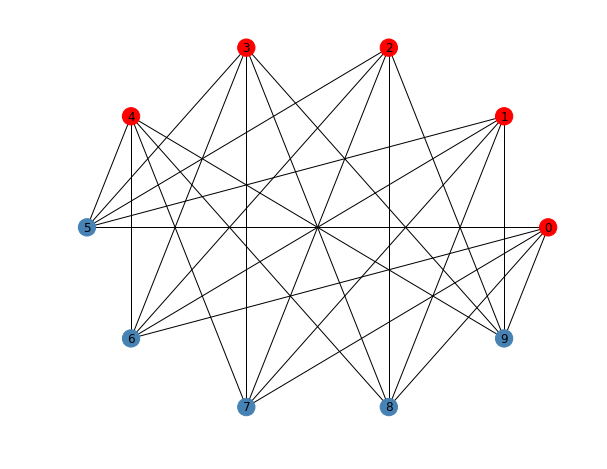

In [4]:
plt.figure(figsize=(10, 8))
plt.axis('off')

colors = ['steelblue', 'red']
node_color = [colors[partition[i]] for i in graph]
pos = nx.circular_layout(graph)

nx.draw_networkx(graph, pos=pos, node_color=node_color)

## graph #2

In [5]:
graph = nx.circulant_graph(10, [1])
partition = test_bipartiteness(graph)
partition

{0: 1, 1: 0, 2: 1, 3: 0, 4: 1, 5: 0, 6: 1, 7: 0, 8: 1, 9: 0}

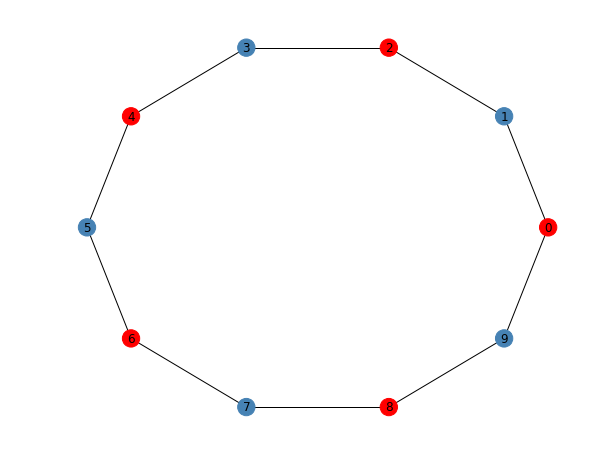

In [6]:
plt.figure(figsize=(10, 8))
plt.axis('off')

colors = ['steelblue', 'red']
node_color = [colors[partition[i]] for i in graph]
pos = nx.circular_layout(graph)

nx.draw_networkx(graph, pos=pos, node_color=node_color)

## graph #3

In [7]:
try:
    graph = nx.complete_multipartite_graph(2, 2, 2)
    test_bipartiteness(graph)
except ValueError as e:
    print(e)

graph is not bipartite


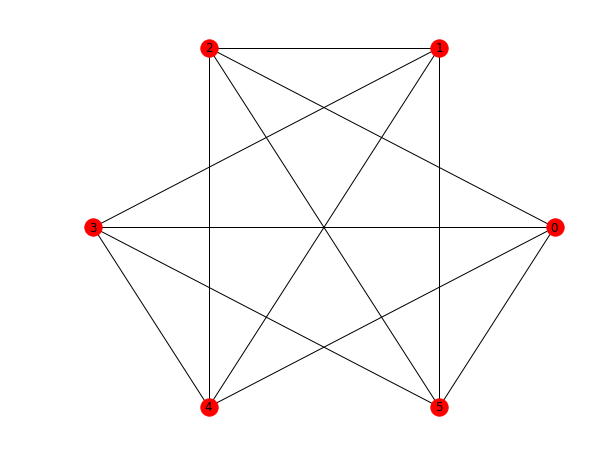

In [8]:
plt.figure(figsize=(10, 8))
plt.axis('off')

nx.draw_networkx(graph, pos=nx.circular_layout(graph))